In [1]:
# Python Notebook for PHYS 429 Experiment #3 

from scipy import integrate
from matplotlib import rc
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy as sp
from scipy.optimize import curve_fit
import random
from scipy.signal import argrelextrema
import mplcursors

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'

from matplotlib.colors import PowerNorm

#from pyxrf.api import *


In [2]:
# need to import the data:

abs_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 3/Data/Phys 429 Experiment 3/'

uncut_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 3/Data/Phys 429 Experiment 3/uncut_meteor_spectrum.mca'
uncut = np.genfromtxt(uncut_path, delimiter=',',encoding='latin-1').T
uncut = [uncut[i] for i in range(len(uncut)) if np.isnan(uncut[i]) ==False]

# paths=['calibration_01-25_pipe.mca','calibration_01-26_pipe_0.5-9.5_kev.mca',
#        'calibration_01-26_pipe_2-27kev.mca','calibration_01-26_pipe_3-60_kev.mca',
#        'met_spec_01-26_0.5-9.5_kev.mca','met_spec_01-26_2-27_kev.mca',
#        'met_spec_01-26_3-60_kev_(30kV).mca','met_spec_back_01-26_3-60_kev_(50kV).mca',
#        'met_spec_back_01-26_3-60_kev_(50kV)_2.mca','met_spec_bad_01-26.mca',
#        'uncut_meteor_spectrum.mca']


paths = ['calibration_01-25_pipe.mca',
            'calibration_01-26_pipe_0.5-9.5_kev.mca',
            'calibration_01-26_pipe_2-27kev.mca',
            'calibration_01-26_pipe_3-60_kev.mca',
            'calibration_02-08_block_g100.mca',
            'calibration_02-08_block_g15.mca',
            'calibration_02-08_block_g150.mca',
            'calibration_02-08_block_g25.mca',
            'calibration_02-08_block_g40.mca',
            'met_spec_01-26_0.5-9.5_kev.mca',
            'met_spec_01-26_2-27_kev.mca',
            'met_spec_01-26_3-60_kev_(30kV).mca',
            'met_spec_02-08_g100.mca',
            'met_spec_02-08_g150.mca',
            'met_spec_02-08_g25.mca',
            'met_spec_02-08_g40.mca',
            'met_spec_02-08_g75.mca',
            'met_spec_back_01-26_3-60_kev_(50kV).mca',
            'met_spec_back_01-26_3-60_kev_(50kV)_2.mca',
            'met_spec_bad_01-26.mca',
            'uncut_meteor_spectrum.mca']




data = []
for i,path in enumerate(paths):
    dat = np.genfromtxt(abs_path+path, delimiter=',',encoding='latin-1').T
    data.append([dat[i] for i in range(len(dat)) if np.isnan(dat[i]) ==False])


fig_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 3/Images'

In [285]:
# We have three major regimes in this part of the lab: sg, mg, lg (Small, medium, large gain)

data_sg = np.array([data[1], data[9]])

data_mg = np.array([data[2], data[10]])

data_lg = np.array([data[3], data[11], data[12]])

uncut_data = np.array([data[2], data[-1]])

data_g25 = np.array([data[7], data[14]])
data_g40 = np.array([data[8], data[15]])
data_g75 = np.array([data[0], data[16]]) # no cal
data_g100 = np.array([data[4], data[12]])
data_g150 = np.array([data[6], data[13]])



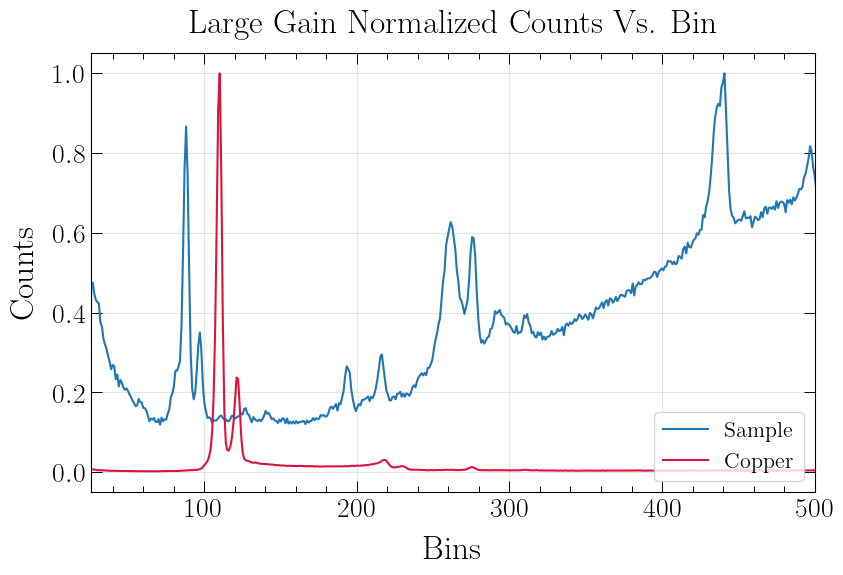

In [295]:
bins = np.linspace(0,512,512)

width=10;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Large Gain Normalized Counts Vs. Bin", pad = 15, fontsize=24)
ax1.set_ylabel(r"Counts",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Bins",labelpad =10,fontsize=24)

#ax1.semilogy(bins, data_g25[1]/max(data_g25[1]), c='navy', label='Sample')
ax1.plot(bins, data_g40[1]/max(data_g40[1]), label='Sample')
# ax1.semilogy(bins, data_g100[1]/max(data_g100[1]), label='Sample')
# ax1.semilogy(bins, data_g150[1]/max(data_g150[1]), label='Sample')
# ax1.semilogy(bins, data_g75[1]/max(data_g75[1]), label='Sample')


ax1.plot(bins, data_g40[0]/max(data_g40[0]), c='crimson', label='Copper')

mplcursors.cursor(hover=True)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(2));ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.set_major_locator(MultipleLocator(100));ax1.xaxis.set_minor_locator(MultipleLocator(20))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 16}, loc='lower right')
#ax1.set_ylim(0.0005,1.8)
ax1.set_xlim(26,500)

ax1.grid(True)
plt.show()

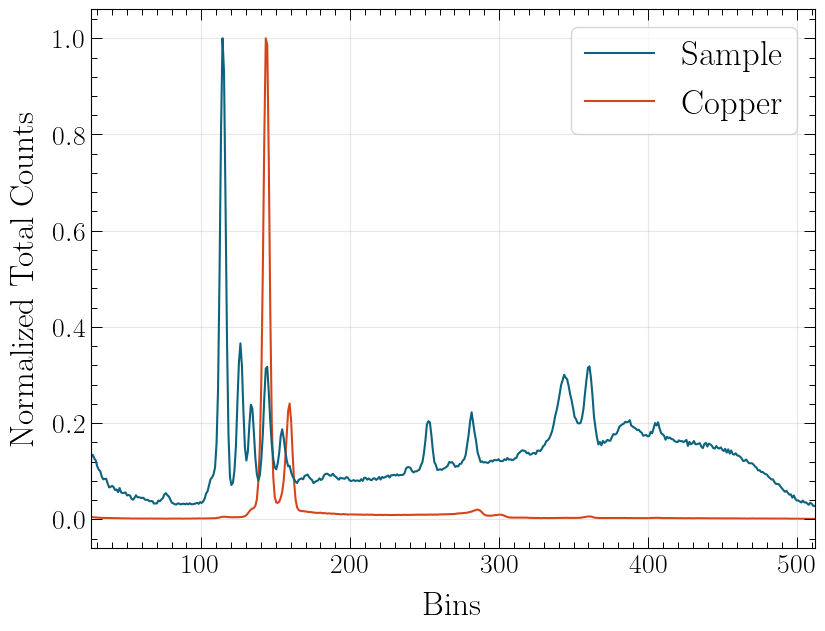

In [364]:
# will plot the small gain to get our bearings:
bins = np.linspace(0,512,512)

width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
#ax1.set_title(r"Large Gain Normalized Counts Vs. Bin", pad = 15, fontsize=24)
ax1.set_ylabel(r"Normalized Total Counts",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Bins",labelpad =10,fontsize=24)

ax1.plot(bins, data_mg[1]/max(data_mg[1]), c='#0c637d', label='Sample')
ax1.plot(bins, data_mg[0]/max(data_mg[0]), c='#d6451a', label='Copper', zorder=0)

mplcursors.cursor(hover=True)

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.2));ax1.yaxis.set_minor_locator(MultipleLocator(0.04))
ax1.xaxis.set_major_locator(MultipleLocator(100));ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 25}, loc='upper right')
ax1.set_ylim(-0.06,1.06)
ax1.set_xlim(26,512)

ax1.grid(True)

plt.savefig(fig_path+'/copper_calibration', dpi=250)

plt.show()

Calibration curve should look like:

$$
y-y_1 = \frac{y_2-y_1}{x_2-x_1} (x-x_1)
$$

In [538]:
# now need to calibrate using the copper spectrum. Will do this by using a peak finder:

from scipy.signal import argrelmax
from scipy.signal import find_peaks

def calibration(bb, E0=8047.78, E1=8905.29,Es=bins):
    m = (E1-E0)/(bb[1]-bb[0])
    E = m*(Es-bb[0]) + E0
    
    return E

#calibration = np.vectorize(calibration)


h= 0.02; d = 1;

cu_lines_lg = find_peaks(data_lg[0]/max(data_lg[0]), height=h, distance=d)[0]
cu_lines_mg = find_peaks(data_mg[0]/max(data_mg[0]), height=h+0.01, distance=d)[0]
cu_lines_sg = find_peaks(data_sg[0]/max(data_sg[0]), height=h+0.02, distance=d)[0]

cu_lines_mg = np.array([143,158])
lg_energy = calibration(cu_lines_lg)
mg_energy = calibration(cu_lines_mg)
sg_energy = calibration(cu_lines_sg)

cu_lines_g40 = find_peaks(data_g40[0]/max(data_g40[0]), height=h, distance=d)[0]

g40_energy = calibration([110,121.65])


In [539]:
cu_lines_g40

array([110, 121, 133, 141, 218])

In [598]:
# form is [alpha1, beta1] ...

titanium = [4510.84,4931.81]
scandium = [4090.6]
iron = [6403.84, 7057.98]
nickel = [7478.15, 8264.66]
copper = [8047.78, 8905.29]
zinc = [8638.86, 9572.0]
arsenic = [10543.72, 11726.2 ]
strontium =[14165,15835.7]
molybdenum = [17479.34,19608.3]
technetium = [18367.1,20619]
silver = [22162.92,24942.4]
cadmium = [23173.6,26095.5]
gallium = [9251.74,10264.2 ]
barium = [32193.6, 36378.2,4450 ]
zirconium = [15775.1, 17667.8]
ruthenium = [19279.2,21656.8 ] 
rhodium = [20216.1,22723.6 ]

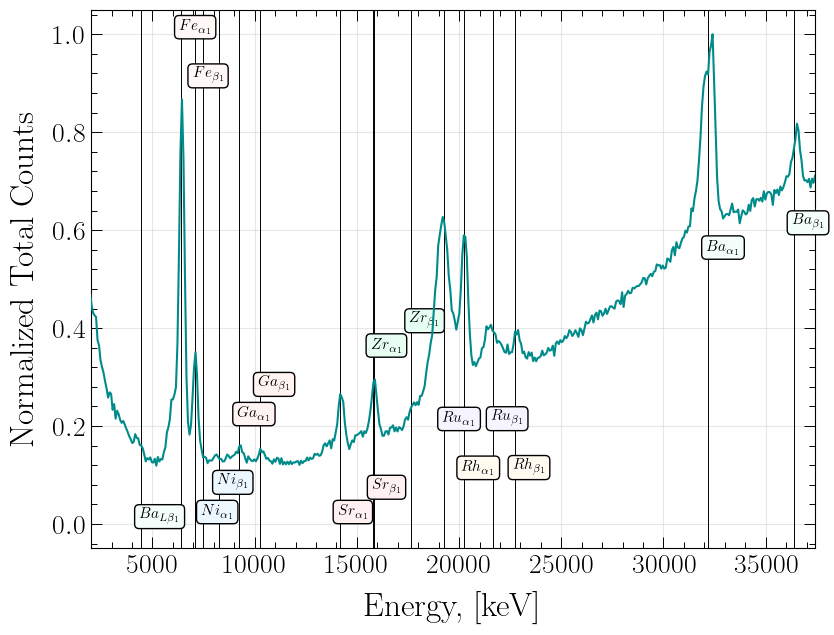

In [667]:
bins = np.linspace(0,512,512)

width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
#ax1.set_title(r"Large Gain Normalized Counts Vs. Bin", pad = 15, fontsize=24)
ax1.set_ylabel(r"Normalized Total Counts",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Energy, [keV]",labelpad =10,fontsize=24)

#ax1.plot(mg_energy, data_mg[1]/max(data_mg[1]), c='crimson', label='Large Gain', linewidth=0.9, zorder=10)

ax1.plot(g40_energy, data_g40[1]/max(data_g40[1]), c='darkcyan', label='Sample',zorder=40)

#'#0c637d'
#add_vertical_line(ax1, strontium[0], r'$Sr_{\alpha_1}$',place=0.04)
#add_vertical_line(ax1, strontium[1], r'$Sr_{\beta_1}$',place=0.04)
add_vertical_line(ax1, iron[0], r'$Fe_{\alpha_1}$',place=1,fc='#fff8f7')
add_vertical_line(ax1, iron[1], r'$Fe_{\beta_1}$',   place=0.9,fc='#fff8f7')

add_vertical_line(ax1, gallium[0], r'$Ga_{\alpha_1}$',place=0.21  ,fc='#fff4f2')
add_vertical_line(ax1, gallium[1], r'$Ga_{\beta_1}$',   place=0.27,fc='#fff4f2')

add_vertical_line(ax1, barium[0], r'$Ba_{\alpha_1}$',place=0.55 ,fc='#f4fffb')
add_vertical_line(ax1, barium[1], r'$Ba_{\beta_1}$',   place=0.6,fc='#f4fffb')
add_vertical_line(ax1, barium[2], r'$Ba_{L\beta_1}$',   place=0.0,fc='#f4fffb')


add_vertical_line(ax1, zirconium[0], r'$Zr_{\alpha_1}$',place=0.35 ,fc='#e7fff3')
add_vertical_line(ax1, zirconium[1], r'$Zr_{\beta_1}$',   place=0.4,fc='#e7fff3')
add_vertical_line(ax1, nickel[0], r'$Ni_{\alpha_1}$',place=0.01,fc='#edf7ff')
add_vertical_line(ax1, nickel[1], r'$Ni_{\beta_1}$', place=0.07,fc='#edf7ff')
add_vertical_line(ax1, strontium[0], r'$Sr_{\alpha_1}$',place=0.01,fc='#fff0f1')
add_vertical_line(ax1, strontium[1], r'$Sr_{\beta_1}$', place=0.06,fc='#fff0f1')

add_vertical_line(ax1, ruthenium[0], r'$Ru_{\alpha_1}$',place=0.2,fc='#f6f5ff')
add_vertical_line(ax1, ruthenium[1], r'$Ru_{\beta_1}$', place=0.2,fc='#f6f5ff')

add_vertical_line(ax1, rhodium[0], r'$Rh_{\alpha_1}$',place=0.1,fc='#fffbf0')
add_vertical_line(ax1, rhodium[1], r'$Rh_{\beta_1}$', place=0.1,fc='#fffbf0')

#add_vertical_line(ax1, 30972, r'$Cu_{\alpha_1}$',place=1)
#add_vertical_line(ax1, 34969, r'$Cu_{\beta_1}$', place=1)
# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.2));ax1.yaxis.set_minor_locator(MultipleLocator(0.04))
ax1.xaxis.set_major_locator(MultipleLocator(5000));ax1.xaxis.set_minor_locator(MultipleLocator(1000))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 25}, loc='upper right')
#ax1.set_ylim(-0.06,1.06)
ax1.set_xlim(2000,37400)

#plt.savefig(fig_path+'/whole_spectra', dpi=250)

ax1.grid(True)

In [6]:
data_g25 = np.array([data[7], data[14]])
data_g40 = np.array([data[8], data[15]])
data_g75 = np.array([data[0], data[16]]) # no cal
data_g100 = np.array([data[4], data[12]])
data_g150 = np.array([data[6], data[13]])



array([143, 158])

In [635]:
cu_lines_mg = np.array([143,157.4])
lg_energy = calibration(cu_lines_lg)
mg_energy = calibration(cu_lines_mg)

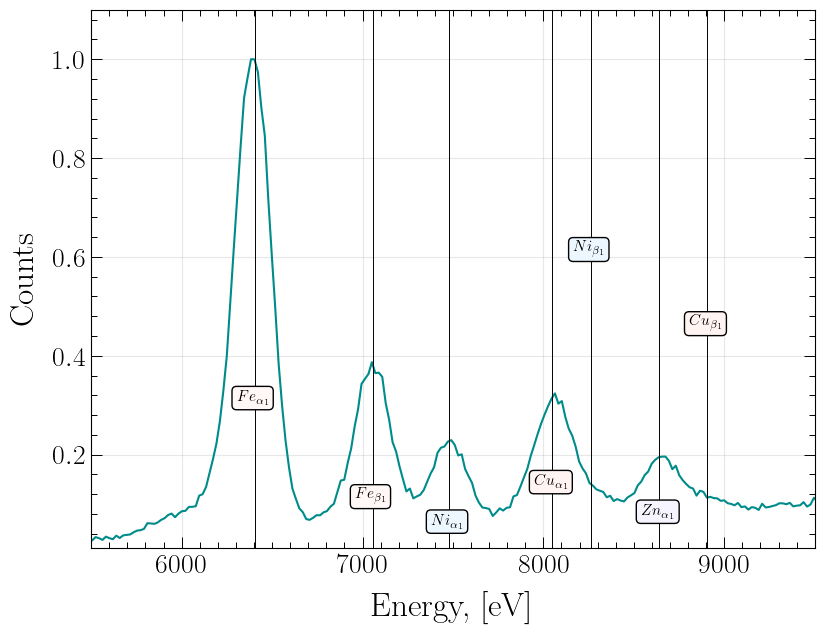

In [665]:
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
#ax1.set_title(r"All Gains Counts Vs. Energy", pad = 15, fontsize=24)
ax1.set_ylabel(r"Counts",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Energy, [eV]",labelpad =10,fontsize=24)

#ax1.plot(lg_energy, data_lg[1]/max(data_lg[1]), c='navy', label='Large Gain')
#ax1.semilogy(mg_energy, data_mg[1]/max(data_mg[1]), c='darkcyan', label='Medium Gain')
#ax1.semilogy(mg_energy, data_mg[0]/max(data_mg[0]), c='#d6451a', label='Copper', zorder=0)

ax1.plot(sg_energy, data_sg[1]/max(data_sg[1]), c='darkcyan', label='Medium Gain')
#ax1.semilogy(sg_energy, data_sg[0]/max(data_sg[0]), c='#d6451a', label='Copper', zorder=0)

#ax1.plot(sg_energy, data_sg[1]/max(data_sg[1]), c='crimson', label='Small Gain')
#add_vertical_line(ax1, iron[0], r'$Fe_{\alpha_1}$',place=0.3)
#add_vertical_line(ax1, iron[1], r'$Fe_{\beta_1}$',   place=0.1)
#add_vertical_line(ax1, nickel[0], r'$Ni_{\alpha_1}$',place=0.05)
#add_vertical_line(ax1, nickel[1], r'$Ni_{\beta_1}$', place=0.6)
add_vertical_line(ax1, copper[0], r'$Cu_{\alpha_1}$',place=0.13,fc='#fff4f2')
add_vertical_line(ax1, copper[1], r'$Cu_{\beta_1}$', place=0.45,fc='#fff4f2')

add_vertical_line(ax1, zinc[0], r'$Zn_{\alpha_1}$',place=0.07,fc='#f6f5ff')

add_vertical_line(ax1, iron[0], r'$Fe_{\alpha_1}$',place=0.3,fc='#fff8f7')
add_vertical_line(ax1, iron[1], r'$Fe_{\beta_1}$',   place=0.1,fc='#fff8f7')


add_vertical_line(ax1, nickel[0], r'$Ni_{\alpha_1}$',place=0.05,fc='#edf7ff')
add_vertical_line(ax1, nickel[1], r'$Ni_{\beta_1}$', place=0.6,fc='#edf7ff')

#ax1.semilogy(bins, data_lg[0]/max(data_lg[0]), c='crimson', label='Copper')

mplcursors.cursor(hover=True)

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.2));ax1.yaxis.set_minor_locator(MultipleLocator(0.04))
ax1.xaxis.set_major_locator(MultipleLocator(1000));ax1.xaxis.set_minor_locator(MultipleLocator(100))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 16}, loc='lower right')
ax1.set_ylim(0.01,1.1)
ax1.set_xlim(5500,9500)



ax1.grid(True)
plt.savefig(fig_path+'/iron_region', dpi=250)

plt.show()

In [663]:
def add_vertical_line(ax, x, label, place=1,color='k', linestyle='-', linewidth=0.7,fc='white'):
    ax.axvline(x=x, color=color, linestyle=linestyle, label=label,linewidth=linewidth)
    ax.text(x-100, place, label,
            verticalalignment='bottom', horizontalalignment='left',
            color=color, fontsize=11, rotation=0,
            bbox=dict(facecolor=fc, edgecolor=color, boxstyle='round,pad=0.3'),
            )


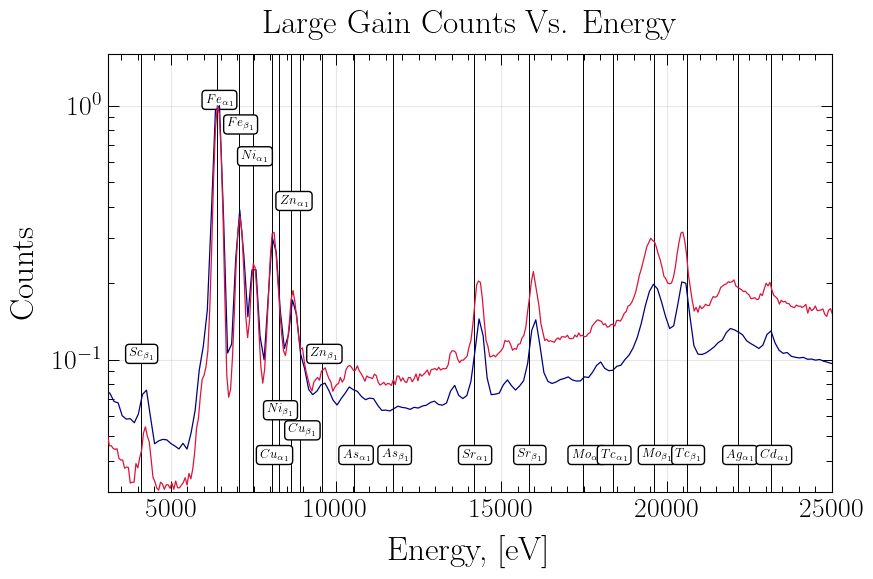

In [504]:

width=10;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
ax1.set_title(r"Large Gain Counts Vs. Energy", pad = 15, fontsize=24)
ax1.set_ylabel(r"Counts",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Energy, [eV]",labelpad =10,fontsize=24)

ax1.semilogy(lg_energy, data_lg[1]/max(data_lg[1]), c='navy', label='Large Gain', linewidth=0.9, zorder=10)
ax1.semilogy(mg_energy, data_mg[1]/max(data_mg[1]), c='crimson', label='Large Gain', linewidth=0.9, zorder=10)

#ax1.axvline(iron[0], c='k', linewidth=0.7)
#ax1.axvline(iron[1], c='k', linewidth=0.7)
#ax1.axvline(nickel[1], c='k', linewidth=0.7)
#ax1.axvline(nickel[0], c='k', linewidth=0.7)

add_vertical_line(ax1, scandium[0], r'$Sc_{\beta_1}$',place=0.1)

add_vertical_line(ax1, iron[0], r'$Fe_{\alpha_1}$')
add_vertical_line(ax1, iron[1], r'$Fe_{\beta_1}$',place=0.8)
add_vertical_line(ax1, nickel[0], r'$Ni_{\alpha_1}$',place=0.6)
add_vertical_line(ax1, nickel[1], r'$Ni_{\beta_1}$',place=0.06)
add_vertical_line(ax1, copper[0], r'$Cu_{\alpha_1}$',place=0.04)
add_vertical_line(ax1, copper[1], r'$Cu_{\beta_1}$',place=0.05)

add_vertical_line(ax1, zinc[0], r'$Zn_{\alpha_1}$',place=0.4)
add_vertical_line(ax1, zinc[1], r'$Zn_{\beta_1}$',place=0.1)

add_vertical_line(ax1, arsenic[0], r'$As_{\alpha_1}$',place=0.04)
add_vertical_line(ax1, arsenic[1], r'$As_{\beta_1}$',place=0.04)

add_vertical_line(ax1, strontium[0], r'$Sr_{\alpha_1}$',place=0.04)
add_vertical_line(ax1, strontium[1], r'$Sr_{\beta_1}$',place=0.04)
add_vertical_line(ax1, molybdenum[0], r'$Mo_{\alpha_1}$',place=0.04)
add_vertical_line(ax1, molybdenum[1], r'$Mo_{\beta_1}$',place=0.04)

add_vertical_line(ax1, technetium[0], r'$Tc_{\alpha_1}$',place=0.04)
add_vertical_line(ax1, technetium[1], r'$Tc_{\beta_1}$',place=0.04)

add_vertical_line(ax1, silver[0], r'$Ag_{\alpha_1}$',place=0.04)
#add_vertical_line(ax1, silver[1], r'$Ag_{\beta_1}$',place=0.04)

add_vertical_line(ax1, cadmium[0], r'$Cd_{\alpha_1}$',place=0.04)
#add_vertical_line(ax1, cadmium[1], r'$Cd_{\beta_1}$',place=0.04)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(2));ax1.yaxis.set_minor_locator(MultipleLocator(0.4))
ax1.xaxis.set_major_locator(MultipleLocator(5000));ax1.xaxis.set_minor_locator(MultipleLocator(500))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 16}, loc='lower right')
ax1.set_ylim(0.03,1.6)
ax1.set_xlim(3100,25000)

ax1.grid(True)
plt.show()

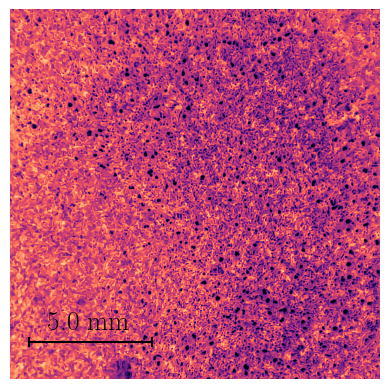

In [267]:
image_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 3/Images/'

import cv2
from matplotlib.colors import Normalize
from PIL import Image
#from matplotlib_scalebar.scalebar import ScaleBar


image_path = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 3/Images/PXL_20240202_012925812.jpg'

image = Image.open(image_path)
image_array = np.array(image)

image2 = image_array[2780:3780,2000:3000]
image3 = image2[:,:,0]
image4 = image_array[80:3080, 0: 3000][:,:,0]

fig, ax2 = plt.subplots(1,1)

# Define a colormap (e.g., 'viridis', 'plasma', 'cividis', etc.)
colormap = 'magma_r'

# Normalize the image values to fit within the colormap range
norm = Normalize(vmin=image_array.min(), vmax=image_array.max())

# Display the image with the specified colormap
#ax.imshow(image, cmap=colormap)
ax2.imshow(image4, cmap=colormap)


# Remove axis labels and ticks (optional)
ax2.axis('off')

# Add scale bar (assuming 1 pixel = 1 micron)
scale_bar_length = 1.5  / pix_to_cm / 3 # length of the scale bar in pixels
scale_bar_value = 15 /3 # value of the scale bar (e.g., microns)
scale_bar_unit = 'mm' # units of the scale bar

# Calculate the coordinates for placing the scale bar
x_coord = 0.05 * image4.shape[1]  # x-coordinate (5% from left)
y_coord = 0.9 * image4.shape[0]  # y-coordinate (5% from top)

tick_size=30
# Plot the scale bar
plt.plot([x_coord, x_coord + scale_bar_length], [y_coord, y_coord], color='k', linewidth=1.5)
plt.plot([x_coord + scale_bar_length, x_coord + scale_bar_length], [y_coord - tick_size, y_coord + tick_size], color='k', linewidth=1.5)
plt.plot([x_coord + scale_bar_length, x_coord + scale_bar_length], [y_coord - tick_size, y_coord + tick_size], color='k', linewidth=1.5)
plt.plot([x_coord, x_coord], [y_coord - tick_size, y_coord + tick_size], color='k', linewidth=1.5)

plt.text(x_coord + scale_bar_length / 2, y_coord - 100, f"{scale_bar_value} {scale_bar_unit}", color='k', ha='center')


# Show the plot
plt.savefig(fig_path+'/contrast_surface', dpi=250)

plt.show()

In [142]:
image_array[:,:,0].shape[1]*pix_to_m

0.015360000000000002

In [141]:
pix_to_cm = 1.5/image4.shape[0]
pix_to_m = pix_to_cm/100
pix_to_m

5e-06

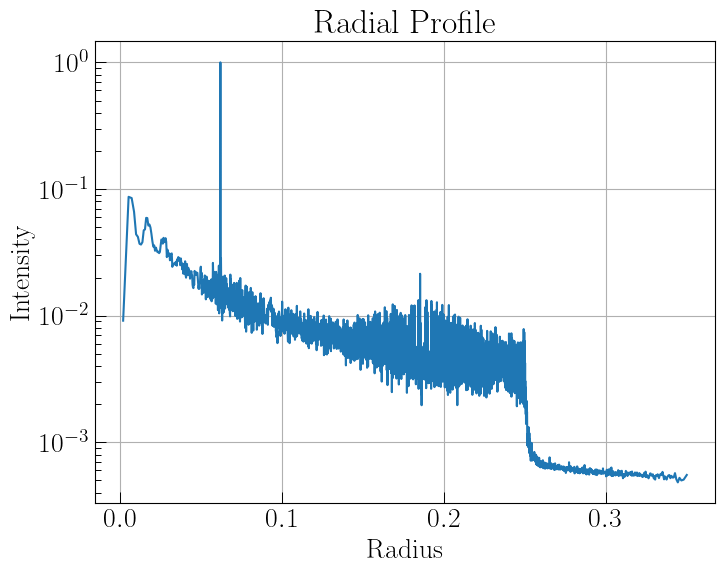

In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def circular_fourier_transform(image):
    # Get the dimensions of the image
    rows, cols = image.shape

    # Create a meshgrid for the frequency domain
    u, v = np.meshgrid(np.fft.fftfreq(rows), np.fft.fftfreq(cols))
    u = np.fft.fftshift(u)
    v = np.fft.fftshift(v)

    # Compute the Circular Fourier Transform
    cft = np.fft.fft2(image)
    cft_shifted = np.fft.fftshift(cft)

    # Compute the magnitude of CFT as a function of radius
    radius = np.sqrt(u**2 + v**2)
    sorted_indices = np.argsort(radius.flat)
    radius_flat = radius.flat[sorted_indices]
    cft_mag_flat = np.abs(cft_shifted).flat[sorted_indices]

    unique_radius, unique_indices = np.unique(radius_flat, return_index=True)
    cft_mag_avg = [np.mean(cft_mag_flat[unique_indices[i]:unique_indices[i+1]]) 
                   if i < len(unique_indices) - 1 
                   else np.mean(cft_mag_flat[unique_indices[i]:])
                   for i in range(len(unique_indices))]

    return unique_radius, cft_mag_avg


# Compute the Radial Fourier Transform
#radius, cft_mag_avg = circular_fourier_transform(image_array[:,:,0])

def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages



#r = moving_average(radius, 1000)
#cft = moving_average(cft_mag_avg, 1000)

r2 = moving_average(radius, 250)
cft2 = moving_average(cft_mag_avg, 250)

image_size = max(image3.shape)  # Assuming square image

def radius_to_size(radius_values, image_size):
    # Compute the sizes corresponding to each radius
    sizes = [1 / (radius / (image_size)) for radius in radius_values]
    return sizes


# Example usage:
#sizes = np.array(radius_to_size(r,image_size))/pix_to_m



# Visualize the radial profile
plt.figure(figsize=(8, 6))
plt.semilogy(np.array(r2[5::900])*0.5,cft2[5::900]/max(cft2[5::900]))
plt.title('Radial Profile')
plt.xlabel('Radius')
plt.ylabel('Intensity')
plt.grid()
plt.show()

In [1]:
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
#ax1.set_title(r"NormaRadial Fourier Transform Spectrum ", pad = 15, fontsize=24)
ax1.set_xlabel(r"Radius, $[m m]$",labelpad =10, fontsize=24)
ax1.set_ylabel(r"Normalized Power",labelpad =10,fontsize=24)

n = 303

ax1.loglog(np.array(r2[::n])*2.13*10**(1),(cft2[::n]/max(cft2[::n]))**1,'#b03915' )

ax1.axvline(1.14, zorder=0, c='#13072a',alpha=0.6, linestyle='--', linewidth=0.9)
ax1.axvline(0.69, zorder=0,c='#13072a',alpha=0.6, linestyle='--',linewidth=0.9)
ax1.axvline(0.245, zorder=0,c='#13072a',alpha=0.6,linestyle='--',linewidth=0.9)
ax1.text(1.22,0.015, r'$1.14 mm $', fontsize=20)
ax1.text(0.73,0.035, r'$0.69 mm $', fontsize=20, zorder=10)
ax1.text(0.26,0.11, r'$0.25 mm $', fontsize=20)



# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(100));ax1.yaxis.set_minor_locator(MultipleLocator(20))
#ax1.xaxis.set_major_locator(MultipleLocator(25));ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 16}, loc='lower right')
#ax1.set_ylim(0.001,1.8)
#ax1.set_xlim(1000,30000)

ax1.grid(True)
plt.savefig(fig_path+'/power_spectrum', dpi=250)

plt.show()

NameError: name 'plt' is not defined

In [316]:
gains = np.array([5, 25,50, 75, 100,125,150,172])#+50
peak_bin = np.array([33, 67,135,200,275,333,398,480])

def lin(x, m,b):
    return m*x + b

def chi_squared_reduced(data, model, sigma, dof=None):

    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual / (sigma**2))
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        print(nu)
        return chi_sq / nu

p0 = (9,0.06) # start with values near those we expect
params2, cv2 = sp.optimize.curve_fit(lin, gains, peak_bin, p0)
m,b = params2
err_con2 = np.sqrt(np.diag(cv2))

print(params2, err_con2)

bin_mod = lin(np.array(gains), *params2)

chi = chi_squared_reduced(np.array(peak_bin),bin_mod,peak_bin, dof=None)

chi_p = 1 - sp.stats.chi2.cdf(chi, 6)

print(chi, chi_p)

[2.66872626 5.94427039] [0.06434267 6.68993508]
0.1836399575303991 0.9998795458868517


In [661]:
chi*6

1.1018397451823947

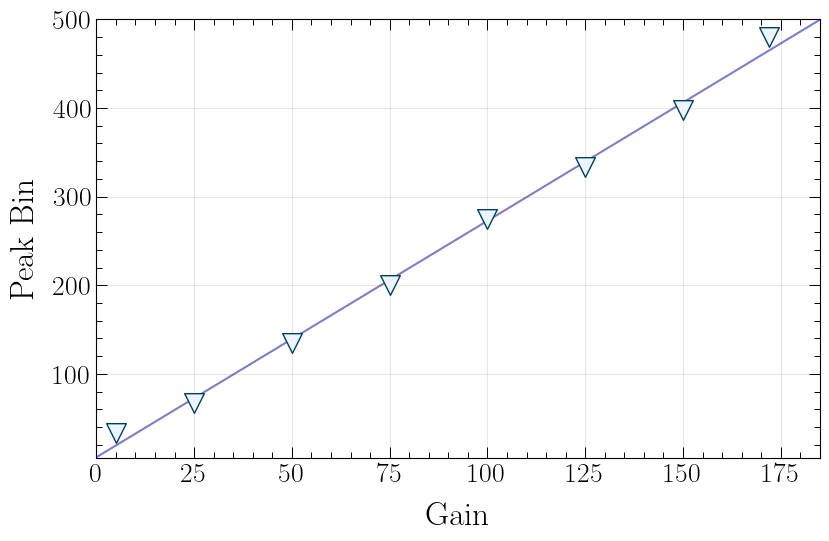

In [337]:
# code for calibration curve:

input_v = 50 #kV

gains = np.array([5, 25,50, 75, 100,125,150,172])#+50
peak_bin = [33, 67,135,200,275,333,398,480]


width=10;height=7;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# labels
#ax1.set_title(r"Gain Vs. Peak Bin Calibration Curve", pad = 15, fontsize=24)
ax1.set_ylabel(r"Peak Bin",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Gain",labelpad =10,fontsize=24)

ax1.scatter(gains,peak_bin,color='#ecf4ff', edgecolor='#003f5c',zorder=15,alpha=1, marker='v',s=200)
ax1.plot(np.linspace(-10, 200), lin(np.linspace(-10, 200), *params2), zorder =10,c='navy',alpha=0.5 )
#ax1.plot(

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(100));ax1.yaxis.set_minor_locator(MultipleLocator(20))
ax1.xaxis.set_major_locator(MultipleLocator(25));ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 16}, loc='lower right')
ax1.set_ylim(5,500)
ax1.set_xlim(-0,185)

ax1.grid(True)
plt.savefig(fig_path+'/gain_calibration', dpi=250)

plt.show()

In [34]:
# other tests:

# 1: Geiger Muller:



# 2: Specific Gravity:

# rho_obj / rho_h20 = SG 

m_met = 54.64 # +/- 0.005 g
m_beak = 54.90 # +/- 0.005 g
disp = 17 # +/- 0.5 mL
m_disp = 16.84 # +/- 0.005 g

dens_met = m_met / disp # g/mL
dens_h20 = m_disp / disp # g/mL

spec_grav = dens_met / dens_h20

print(f'Density of Sample is: {dens_met:.3f} g/cm^3')

print(f'Specific Gravity is: {spec_grav:.3f}')
print()

# 3: Streak Test:

# pre-polish, does not come off much, does more damage to the ceramic
# positive tests
# 4: Magnetism:

# 5: Composition:

Density of Sample is: 3.214 g/cm^3
Specific Gravity is: 3.245



In [ ]:
# data run february 8th:

# Cu Kalpha = 8047.78; 8027.83 
# Cu Kbeta = 8905.29

# run one: gain = 40
# low energy tail: 
# Cu K alpha = 110; K beta = 121

# run two: gain = 75
# medium low:
# Cu K alpha = 196; K beta = 217 

# run three: gain = 100
# medium:
# Cu K alpha = 275; K beta = 305

# run four: gain = 150
# medium high:
# Cu K alpha = 396; K beta = 438

# run five: gain = 25
# low:
# Cu K alpha = 396; K beta = 438

# run five: gain = 15
# very low:
# Cu K alpha = 396; K beta = 438

